In [ ]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 15.4 MB 42.7 MB/s 
     |████████████████████████████████| 6.3 MB 52.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
parchi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon.zip")
parchi

,FID,NOME,COD_AREA,CLASSIF,DCLASSIF,TIPO,DTIPO,TIPO_AREA,DTIPO_AREA,COD_NOME,geometry
0,5,Parco Alpi Orobie Valtellinesi,18,23,Parco forestale e montano,2,Parco Regionale,1,Area Regionale,18:Parco Alpi Orobie Valtellinesi,"POLYGON ((587577.037 5107497.548, 587615.036 5..."
1,6,Parco Alpi Orobie Bergamasche,17,23,Parco forestale e montano,2,Parco Regionale,1,Area Regionale,17:Parco Alpi Orobie Bergamasche,"POLYGON ((586196.195 5100871.221, 586351.566 5..."
2,7,Parco Campo dei Fiori,9,23,Parco forestale e montano,2,Parco Regionale,1,Area Regionale,9: Parco Campo dei Fiori,"POLYGON ((486537.216 5078441.081, 486530.341 5..."
3,8,Parco Alto Garda Bresciano,7,23,Parco forestale e montano,2,Parco Regionale,1,Area Regionale,7: Parco Alto Garda Bresciano,"POLYGON ((617860.123 5053114.432, 617863.431 5..."
4,1,National Park (CH),99,0,Non valutato,1,Parco Nazionale,3,Area extranazionale,99:National Park (CH),"POLYGON ((584084.298 5161019.100, 583763.056 5..."
5,2,Parco Nazionale dello Stelvio (TN-BZ),97,0,Non valutato,1,Parco Nazionale,2,Area extraregionale,97:Parco Nazionale dello Stelvio (TN-BZ),"POLYGON ((611429.112 5154022.734, 612080.475 5..."
6,3,Parco Nazionale dello Stelvio,98,0,Non valutato,1,Parco Nazionale,1,Area Regionale,98:Parco Nazionale dello Stelvio,"POLYGON ((584084.298 5161019.100, 584083.048 5..."
7,4,Parco Adamello,4,23,Parco forestale e montano,2,Parco Regionale,1,Area Regionale,4: Parco Adamello,"POLYGON ((617719.939 5125721.072, 617744.313 5..."
8,9,Parco Adda Nord,5,45,Parco fluviale e di cintura metropolitana,2,Parco Regionale,1,Area Regionale,5: Parco Adda Nord,"POLYGON ((533258.682 5067541.607, 533248.433 5..."
9,15,Parco Valle del Ticino,1,1245,"Parco agricolo,forestale,fluviale e di cintura...",2,Parco Regionale,1,Area Regionale,1: Parco Valle del Ticino,"POLYGON ((476666.268 5067282.167, 476899.067 5..."


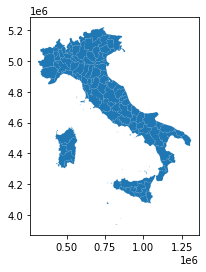

In [ ]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g")
province.plot()

In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g")


In [ ]:
comuniMI = comuni[comuni["COMUNE"]== "Milano"]
comuniMI

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
1882,1,3,15,215,215,15146,015146,Milano,None,1,79382.994008,1.807534e+08,"POLYGON ((513714.538 5042508.056, 513985.199 5..."


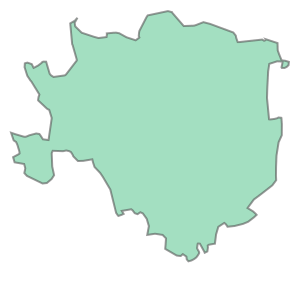

In [ ]:
comuniMilano =  comuniMI.loc[:, 'geometry'].squeeze()
comuniMilano

In [ ]:
parchiMI = parchi[parchi.intersects(comuniMilano)]
parchiMI

,FID,NOME,COD_AREA,CLASSIF,DCLASSIF,TIPO,DTIPO,TIPO_AREA,DTIPO_AREA,COD_NOME,geometry
20,21,Parco Nord Milano,22,5,Parco di cintura metropolitana,2,Parco Regionale,1,Area Regionale,22:Parco Nord Milano,"POLYGON ((516502.662 5041742.040, 516403.321 5..."
21,22,Parco Sud Milano,23,15,Parco agricolo e di cintura metropolitana,2,Parco Regionale,1,Area Regionale,23:Parco Sud Milano,"POLYGON ((533691.079 5042919.602, 533758.703 5..."


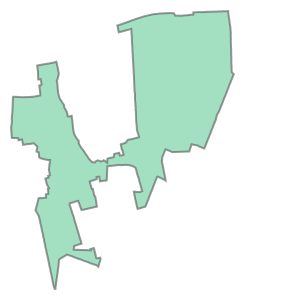

In [ ]:
parchiNord = parchiMI.loc[parchiMI["NOME"] == "Parco Nord Milano", 'geometry'].squeeze()
parchiNord

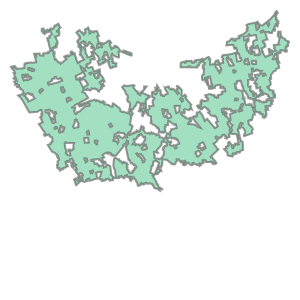

In [ ]:
parchiSud = parchiMI.loc[parchiMI["NOME"] == "Parco Sud Milano", 'geometry'].squeeze()
parchiSud

In [ ]:
comuniParchi = comuni[comuni.intersects(parchiSud) | comuni.intersects(parchiNord)]
comuniParchi

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
1811,1,3,15,215,215,15002,015002,Abbiategrasso,None,0,43048.321516,4.777153e+07,"POLYGON ((493446.898 5029705.643, 493602.897 5..."
1812,1,3,15,215,215,15005,015005,Albairate,None,0,18919.829233,1.567417e+07,"POLYGON ((495595.883 5032525.624, 495661.881 5..."
1815,1,3,15,215,215,15010,015010,Arluno,None,0,18646.960825,1.278364e+07,"POLYGON ((496562.280 5041533.478, 496401.277 5..."
1816,1,3,15,215,215,15011,015011,Assago,None,0,12853.544196,8.397610e+06,"POLYGON ((511386.603 5029333.275, 511518.968 5..."
1817,1,3,15,215,215,15012,015012,Bareggio,None,0,15924.405593,1.130249e+07,"POLYGON ((499326.672 5038880.244, 499885.260 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,1,3,98,0,98,98020,098020,Comazzo,None,0,22343.534930,1.277192e+07,"POLYGON ((534210.409 5035224.602, 534551.968 5..."
7484,1,3,98,0,98,98039,098039,Merlino,None,0,18053.583011,1.039029e+07,"POLYGON ((534698.954 5033625.792, 534731.476 5..."
7486,1,3,98,0,98,98041,098041,Mulazzano,None,0,22643.863100,1.529437e+07,"POLYGON ((530678.622 5027337.660, 530960.619 5..."
7500,1,3,98,0,98,98055,098055,Sordio,None,0,6681.722797,2.603890e+06,"POLYGON ((529834.629 5021137.707, 530206.624 5..."


In [ ]:
!pip install contextily
import contextily

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


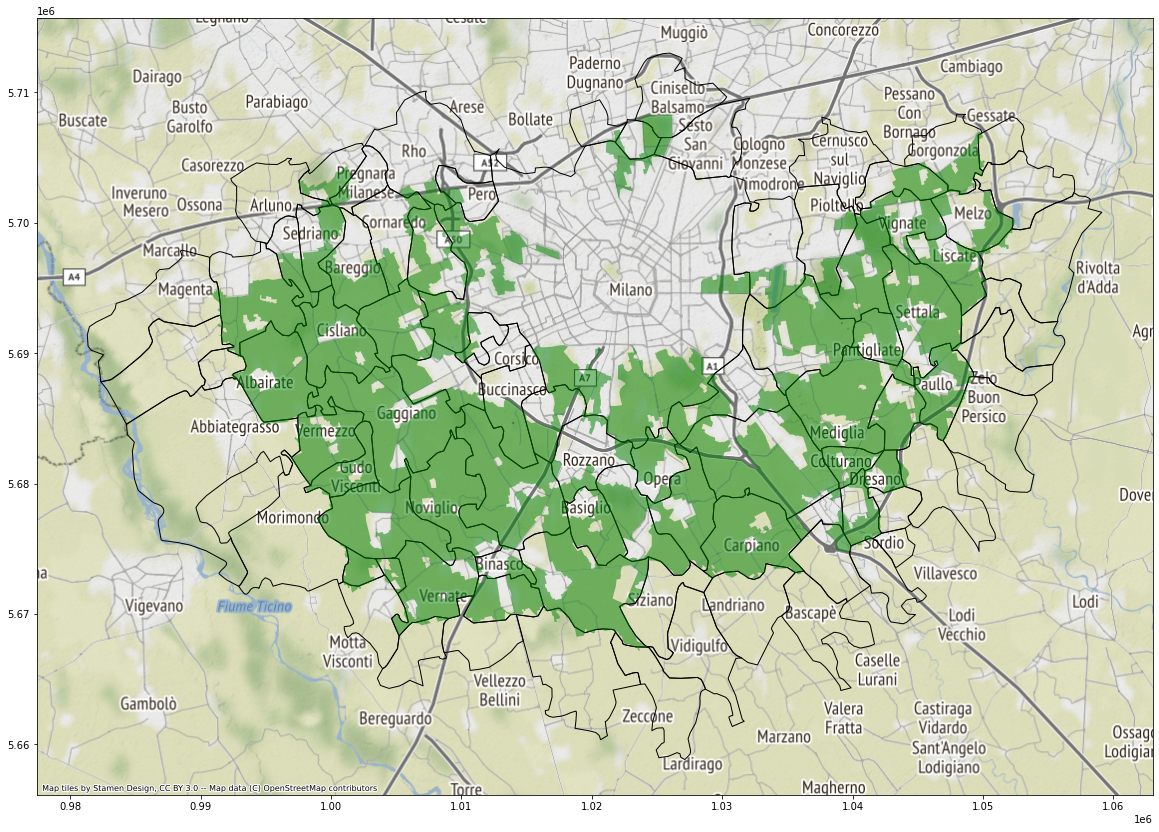

In [ ]:
ax = comuniParchi.to_crs(epsg= 3857).plot(figsize = (20,15),facecolor = "none", edgecolor = "k" )
parchiMI.to_crs(epsg= 3857).plot(ax = ax ,figsize = (20,15),facecolor = "green" , alpha = 0.5 )
contextily.add_basemap(ax)